In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Loading Data

In [ ]:
df=pd.read_csv('winequality-red.csv')
print(df.shape)

print(df['quality'].nunique())
print(df.shape)



(1599, 12)
6
(1599, 12)


In [67]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [69]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# Checking Null values 

In [70]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Checking Duplicate Values and Handling Duplicate Values

In [71]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

df = df.drop_duplicates(keep='last')
print("duplicated removed")

duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")



Total duplicate rows: 240
duplicated removed
Total duplicate rows: 0


# Visualize Feature Distributions (Histograms)


1. **A histogram splits the values of a numeric feature into intervals (called bins) and shows the frequency (count) of values that fall into each bin.**
2. **we Can Know  the Skewness.**<br>
    Tail is longer on the left<br>
    Most data is high, but a few low values pull the average down<br>
    Tail is longer on the right<br>
    Most data is low, with a few high outliers<br>


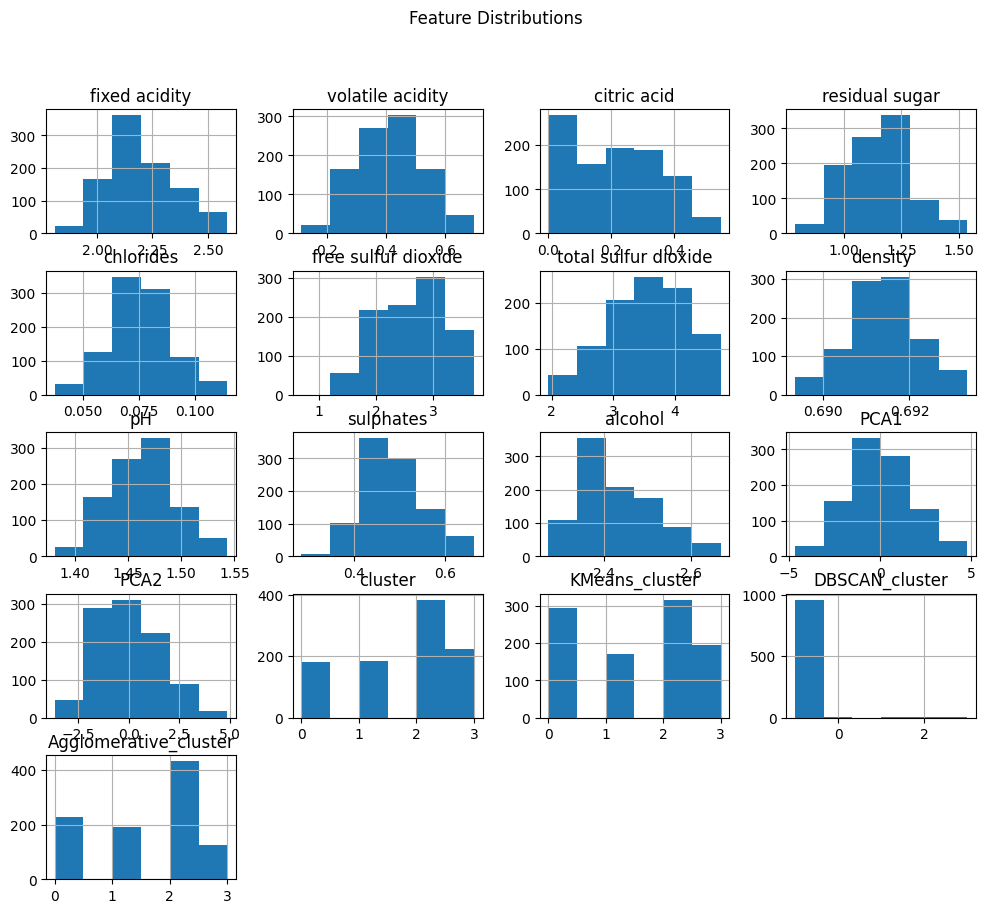

In [87]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=6)
plt.suptitle("Feature Distributions")
plt.show()


# Pairplot

So if you have 4 numeric columns, it draws a 4x4 plot grid.<br>

<h3>Clusters</h3>
If you notice dots forming separate groups → this suggests natural clusters in your data.<br>
<h3>Outliers</h3> 
Points lying far away from the main concentration → potential outliers.
<h3>Distribution Shape</h3>
Look at the diagonal histograms:<br>
    Are they bell-shaped? Skewed?<br>
    Are there gaps or peaks?<br>

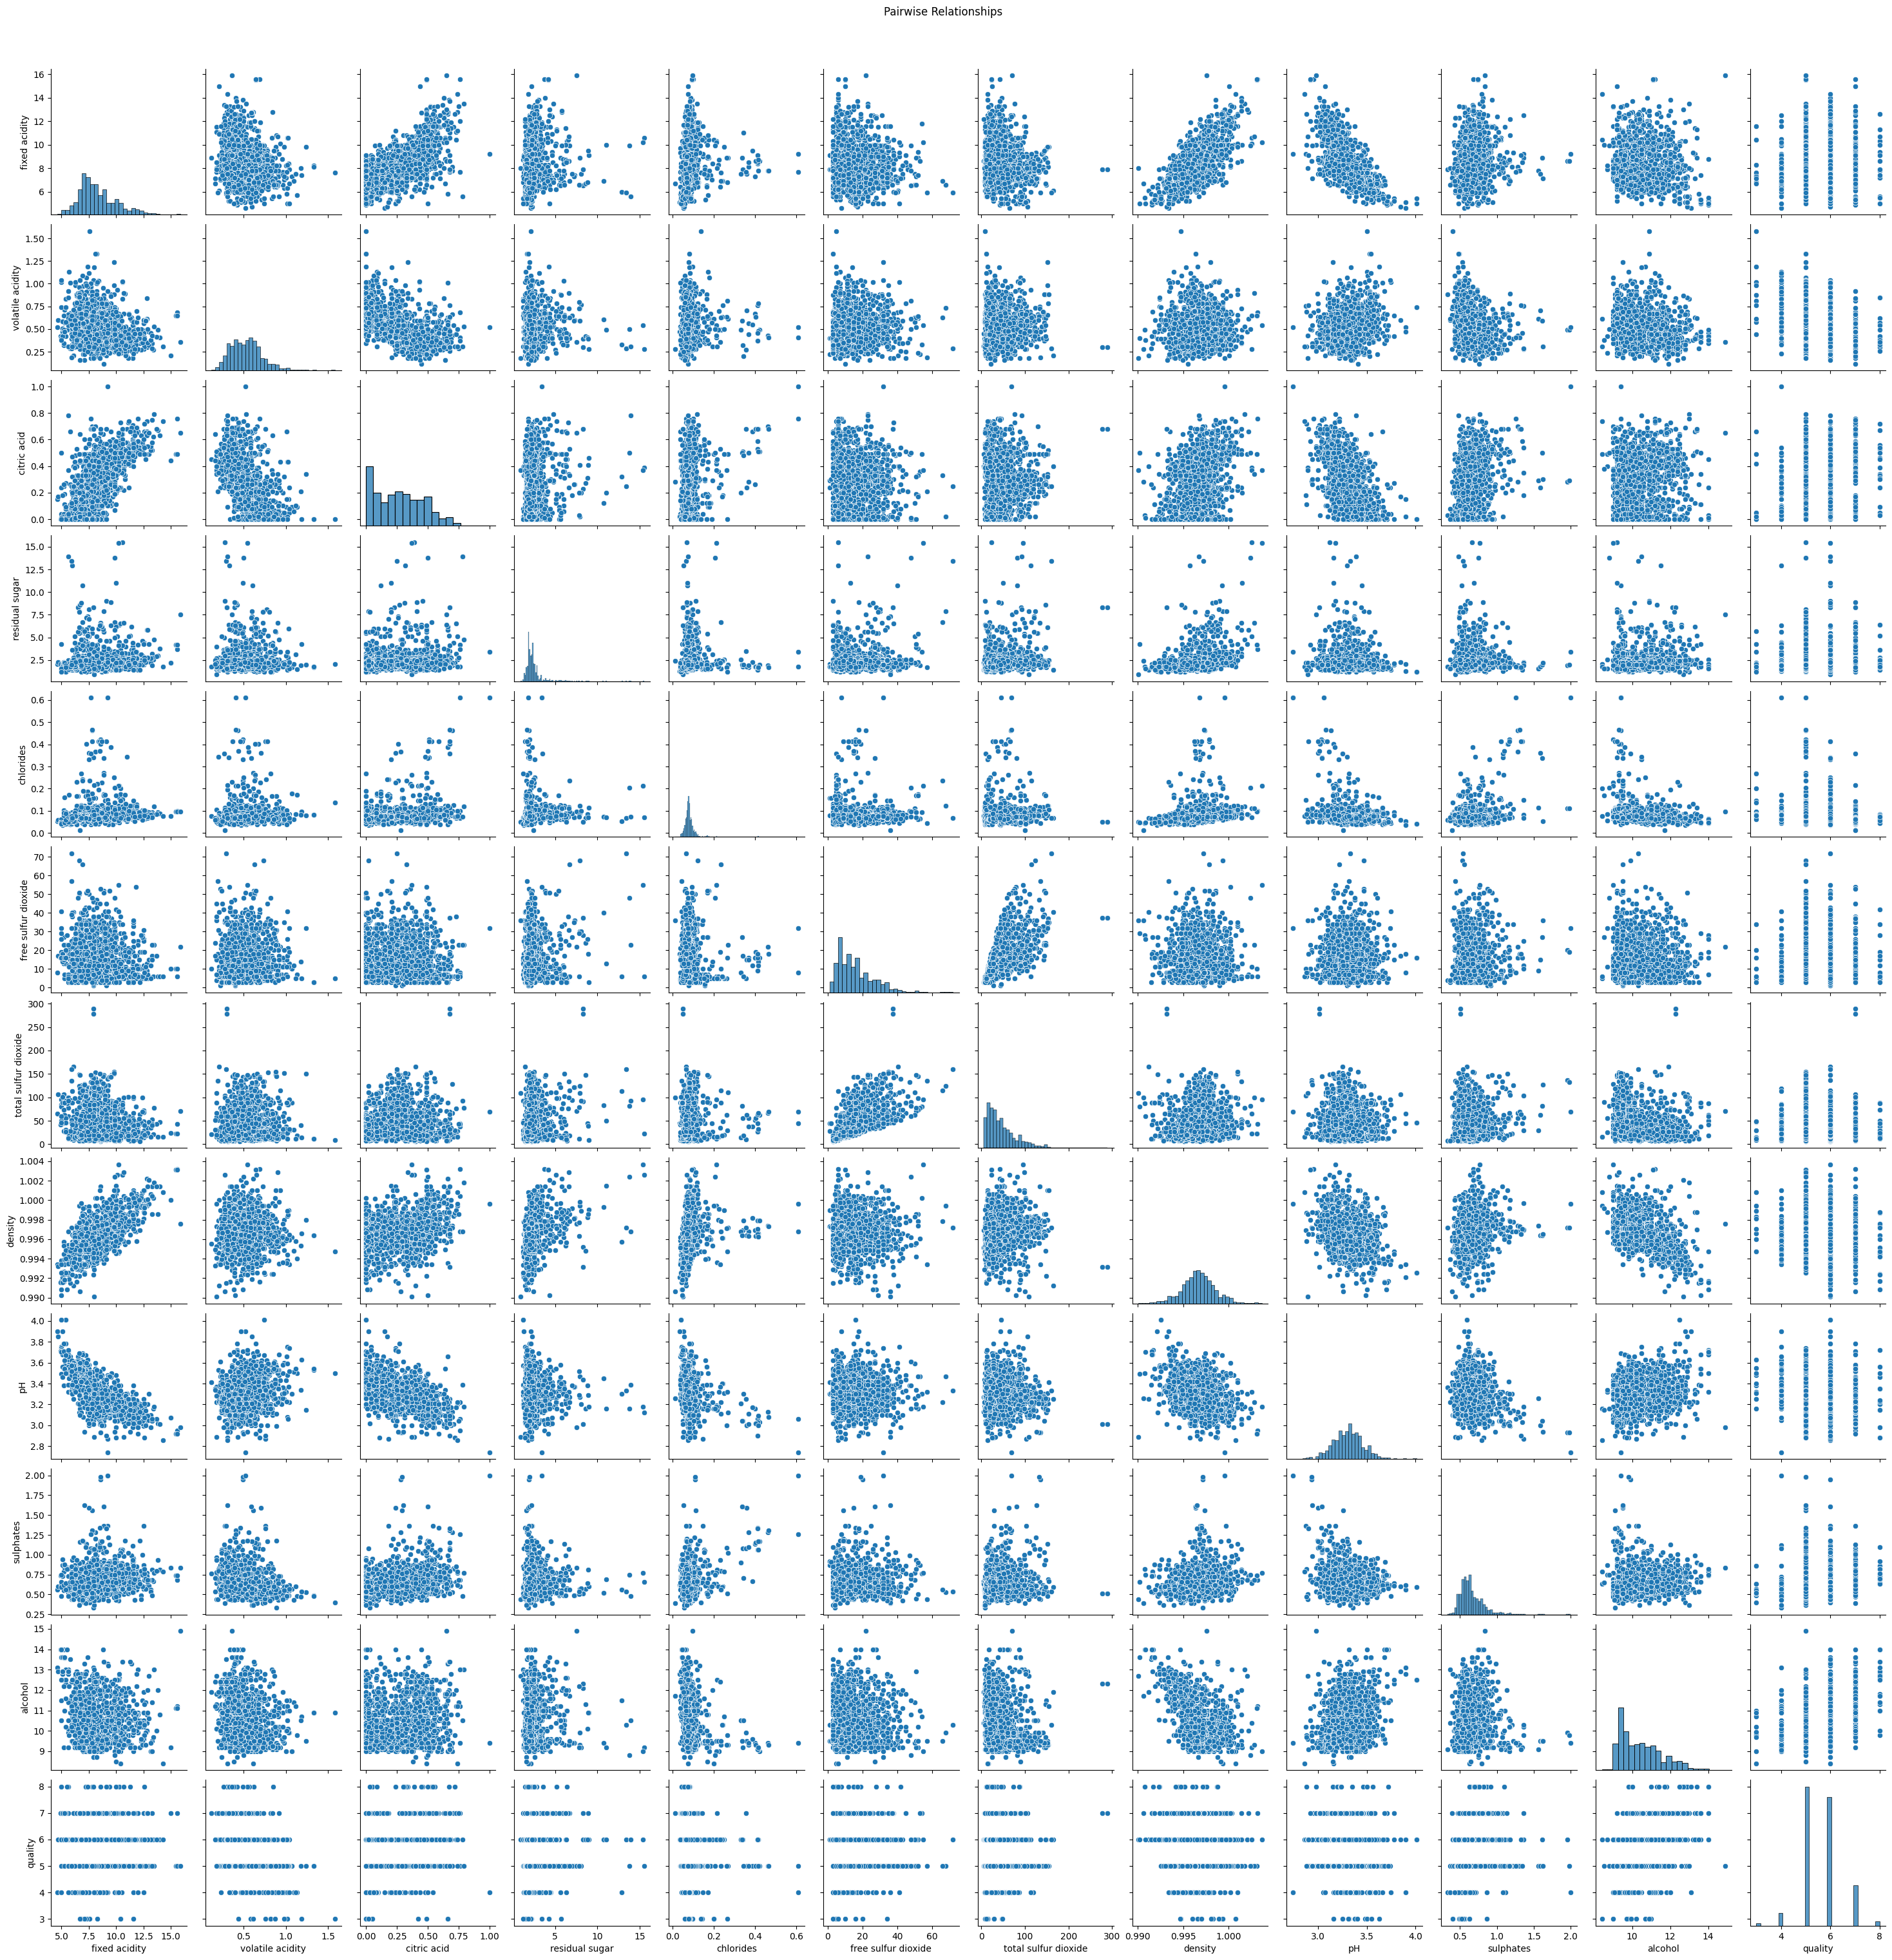

In [73]:
import seaborn as sns

sns.pairplot(df )
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


# Correlation Matrix

df.corr() — the input correlation matrix.<br>

annot=True — displays the numeric correlation value in each cell.<br>

cmap='coolwarm' — sets the color gradient:coolwarm (blue-red) for positive and negative correlations, respectively.<br>

<h4>Measures how much two features move together.</h4> <br>
Values range from -1 to +1:<br>

+1 = perfect positive correlation<br>

-1 = perfect negative correlation<br>

0 = no linear relationship<br>

                       fixed acidity  volatile acidity  citric acid  \
fixed acidity               1.000000         -0.282012     0.635355   
volatile acidity           -0.282012          1.000000    -0.637147   
citric acid                 0.635355         -0.637147     1.000000   
residual sugar              0.223216          0.031237     0.139929   
chlorides                   0.195544          0.140616     0.047571   
free sulfur dioxide        -0.165349          0.014339    -0.084078   
total sulfur dioxide       -0.103262          0.103336    -0.011704   
density                     0.602775          0.053558     0.270902   
pH                         -0.709632          0.241476    -0.479689   
sulphates                   0.155394         -0.323611     0.272657   
alcohol                    -0.031586         -0.239963     0.153605   
PCA1                        0.907008         -0.472721     0.793947   
PCA2                        0.027804         -0.516521     0.300821   
cluste

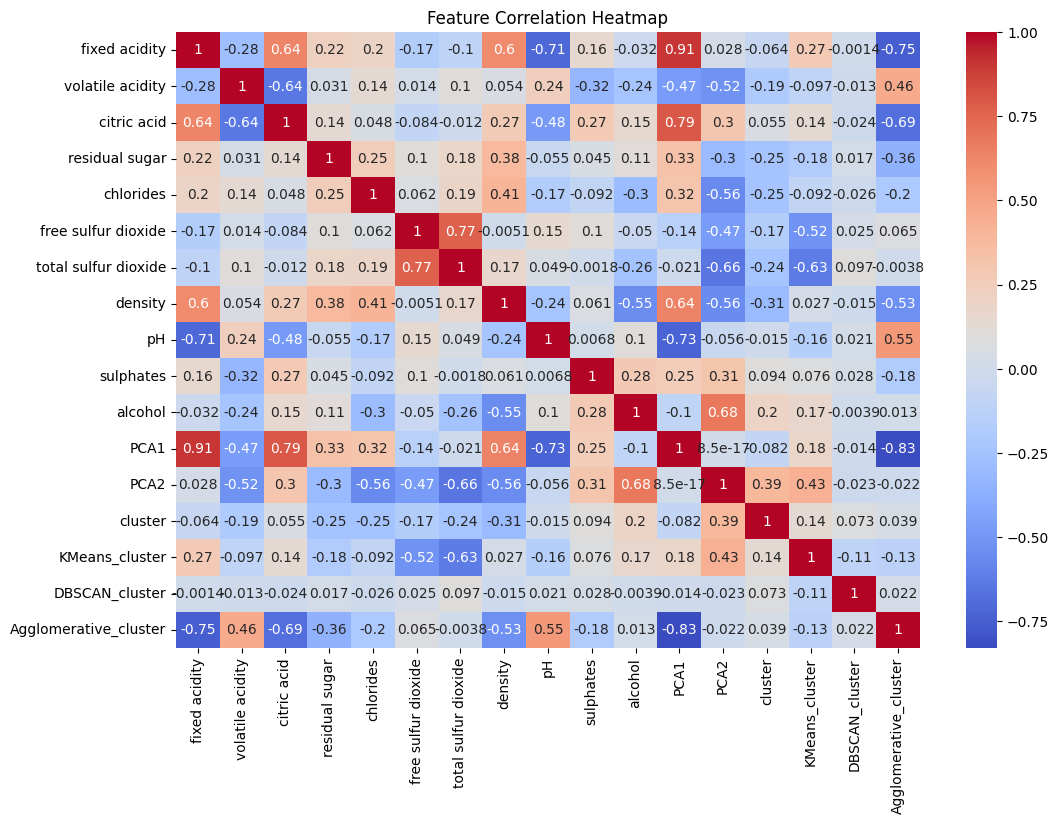

In [85]:
plt.figure(figsize=(12, 8))
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Boxplot
<h3> Boxplots Are Useful to</h3> 
Detect outliers easily<br>

Understand distribution spread<br>

Quickly compare feature distributions <br>

Great for visualizing before/after transformation (e.g., log scale) <br>

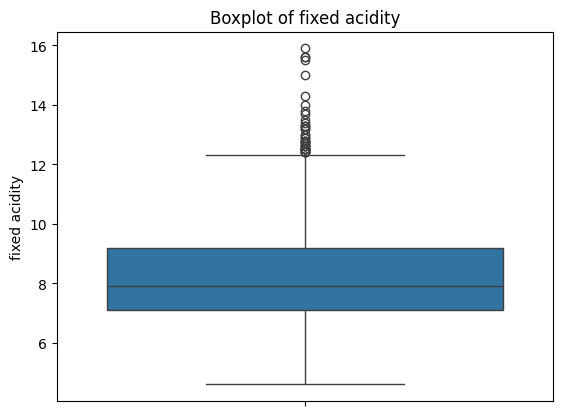

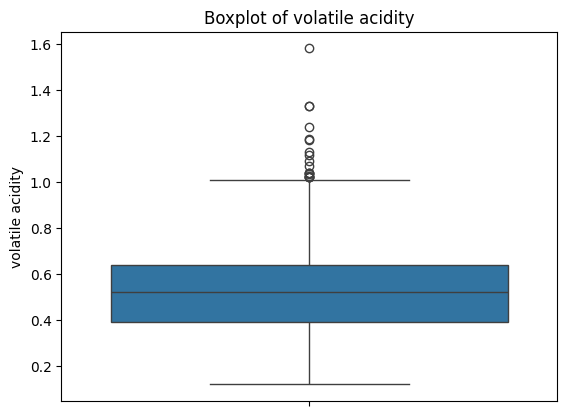

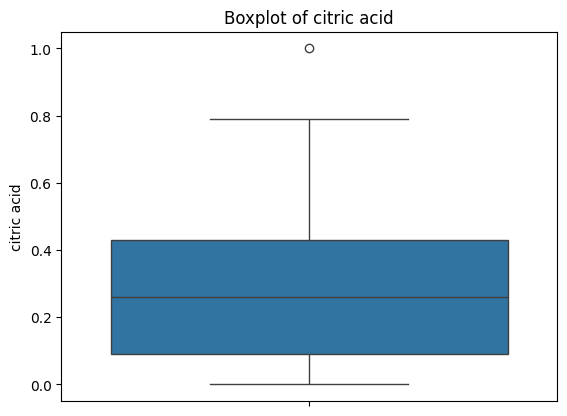

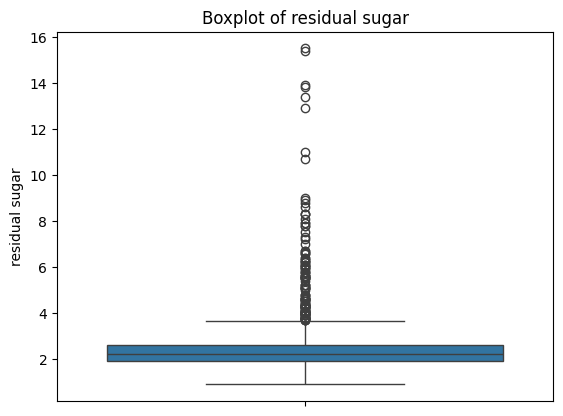

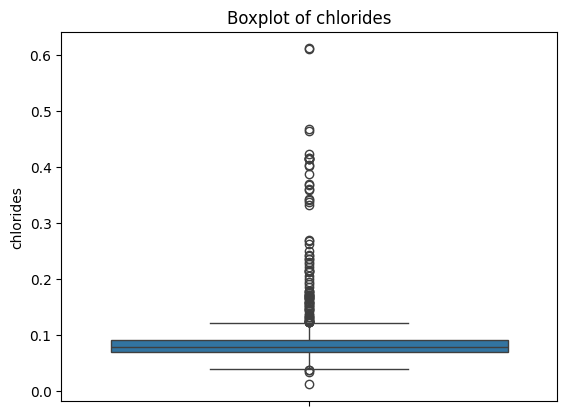

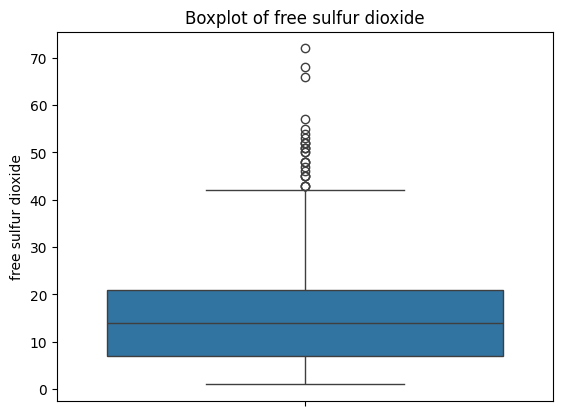

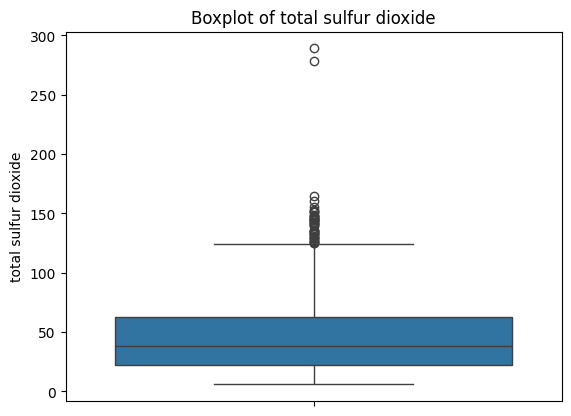

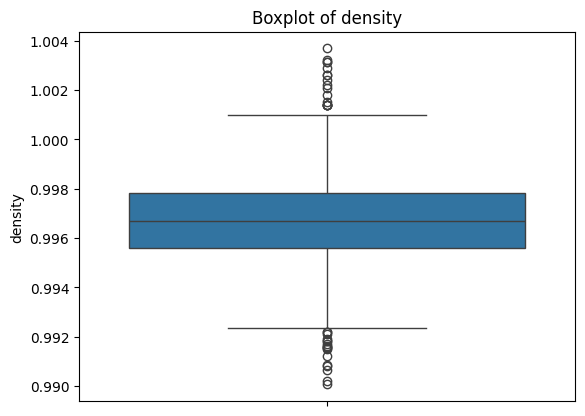

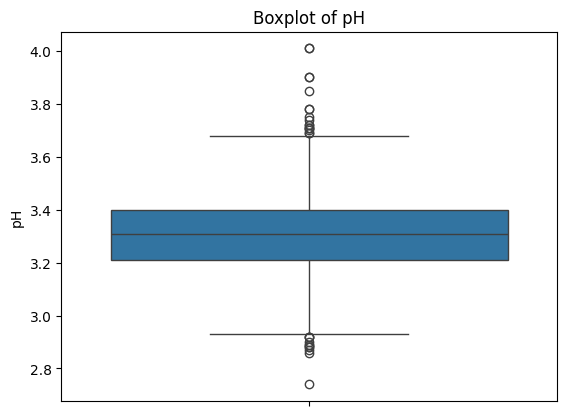

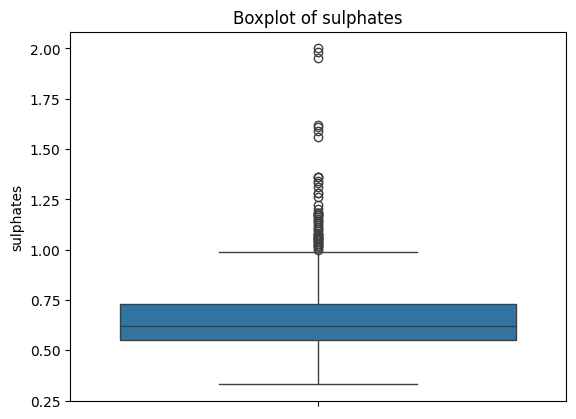

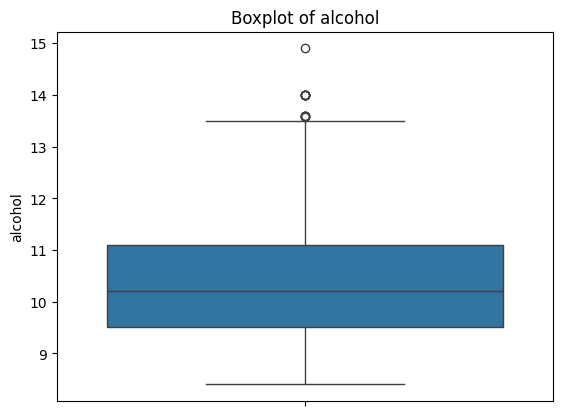

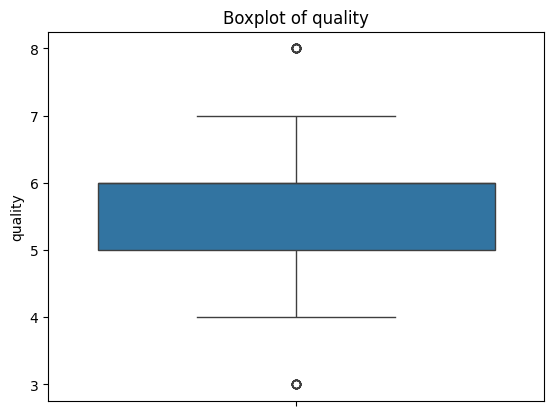

In [75]:

for col in df.select_dtypes(include='number').columns:
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()


# Handling Outliers
1. The function removes outliers from each numeric column in the DataFrame using the IQR (Interquartile Range) method.
2. It calculates the 1st quartile (Q1) and 3rd quartile (Q3) to find the IQR (middle 50% spread of data).
3. It defines a lower and upper limit using the formula:<br>
   Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.

4. Any row with a value outside this range (in any column) is removed.

5. This keeps only rows with values in the normal range and drops rows with extreme values (outliers)


# Reducing  Outliers

1. The code applies a log(1 + x) transformation to all columns to reduce the impact of large values and outliers.

2. This helps make the data more balanced and suitable for machine learning models, especially when the data is skewed.

In [76]:

df = df[(df >= 0).all(axis=1)]
def remove_outliers_iqr(df):                                    # Removes extreme outliers using the IQR rule
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers_iqr(df)


y=df['quality']

for col in df.columns:  # Logarithmic transformation reduces the effect of outliers
    df[col]=np.log1p(df[col])



In [77]:

df=df.drop("quality", axis=1)


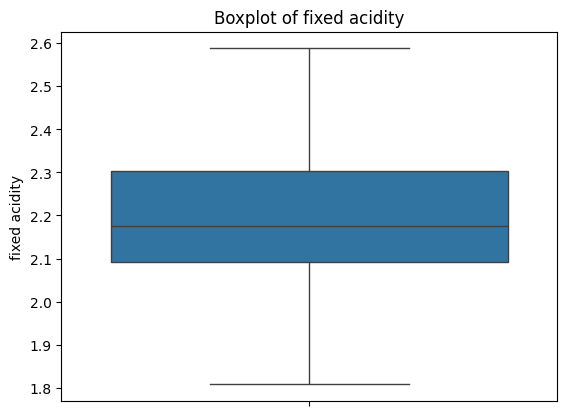

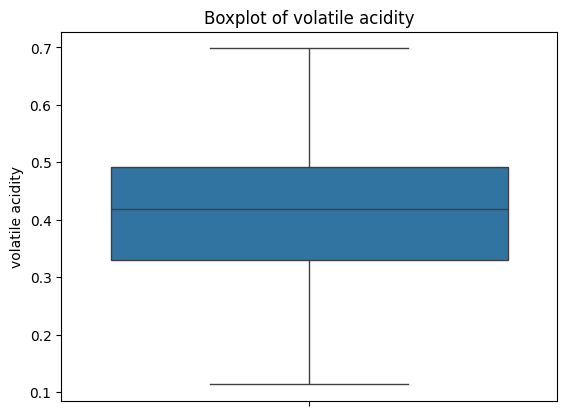

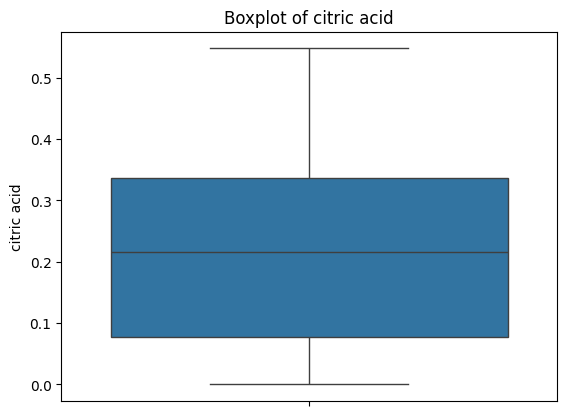

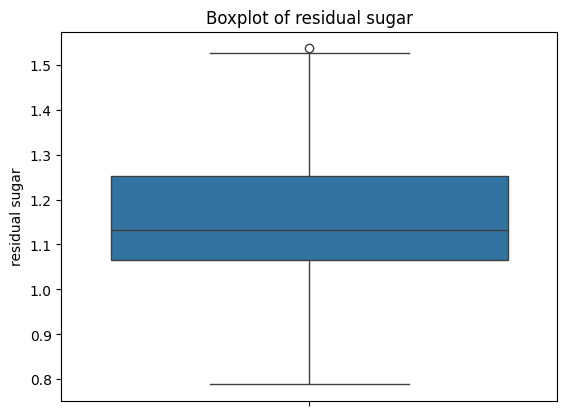

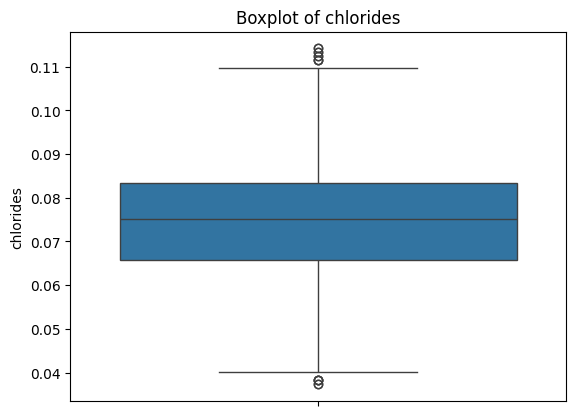

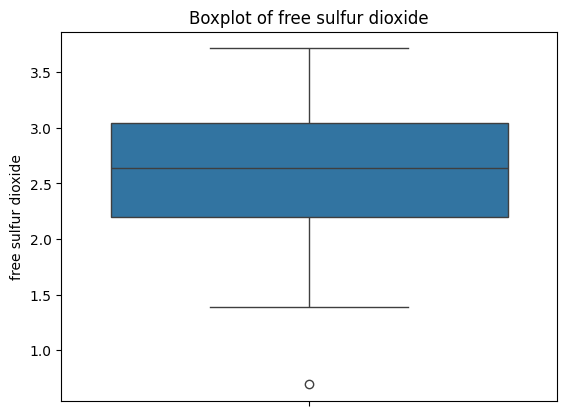

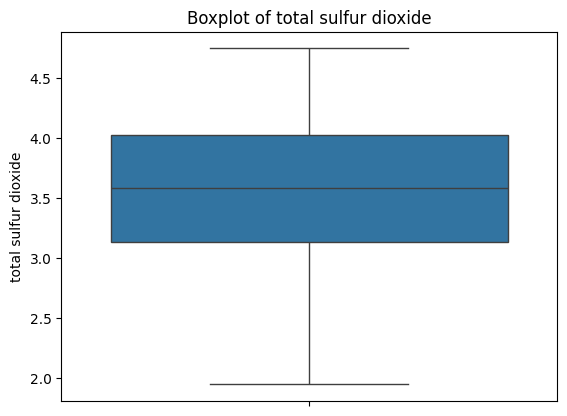

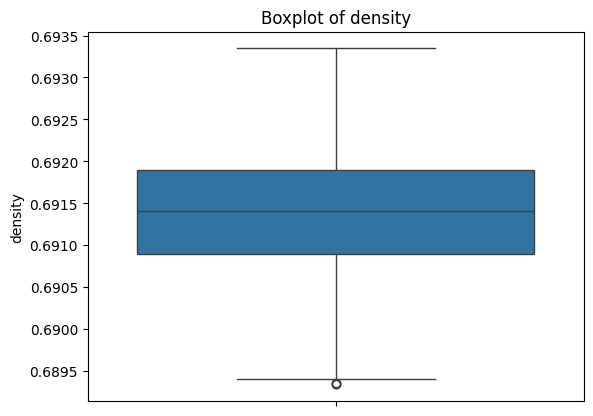

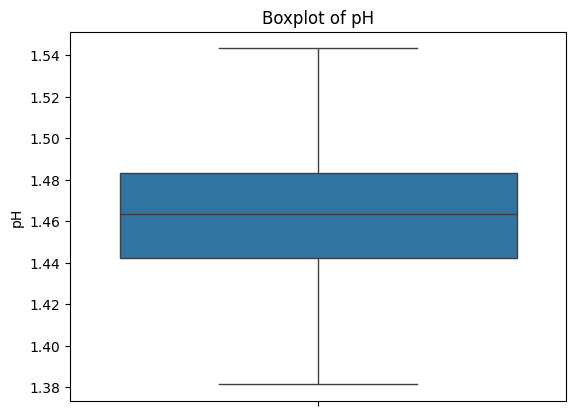

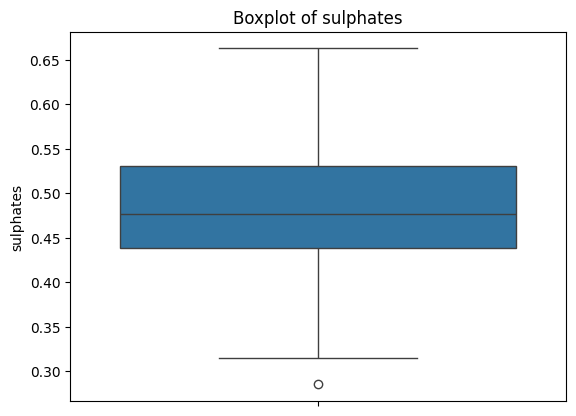

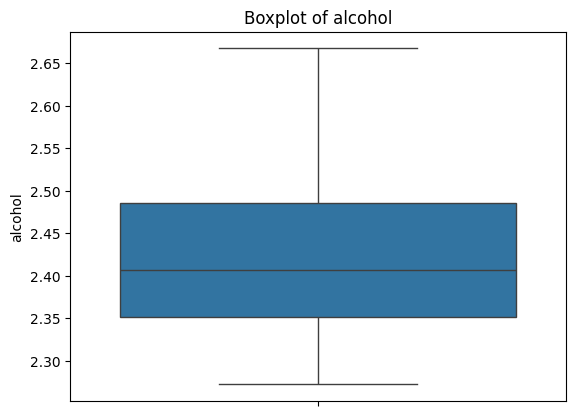

In [78]:
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [79]:
df.shape

(974, 11)

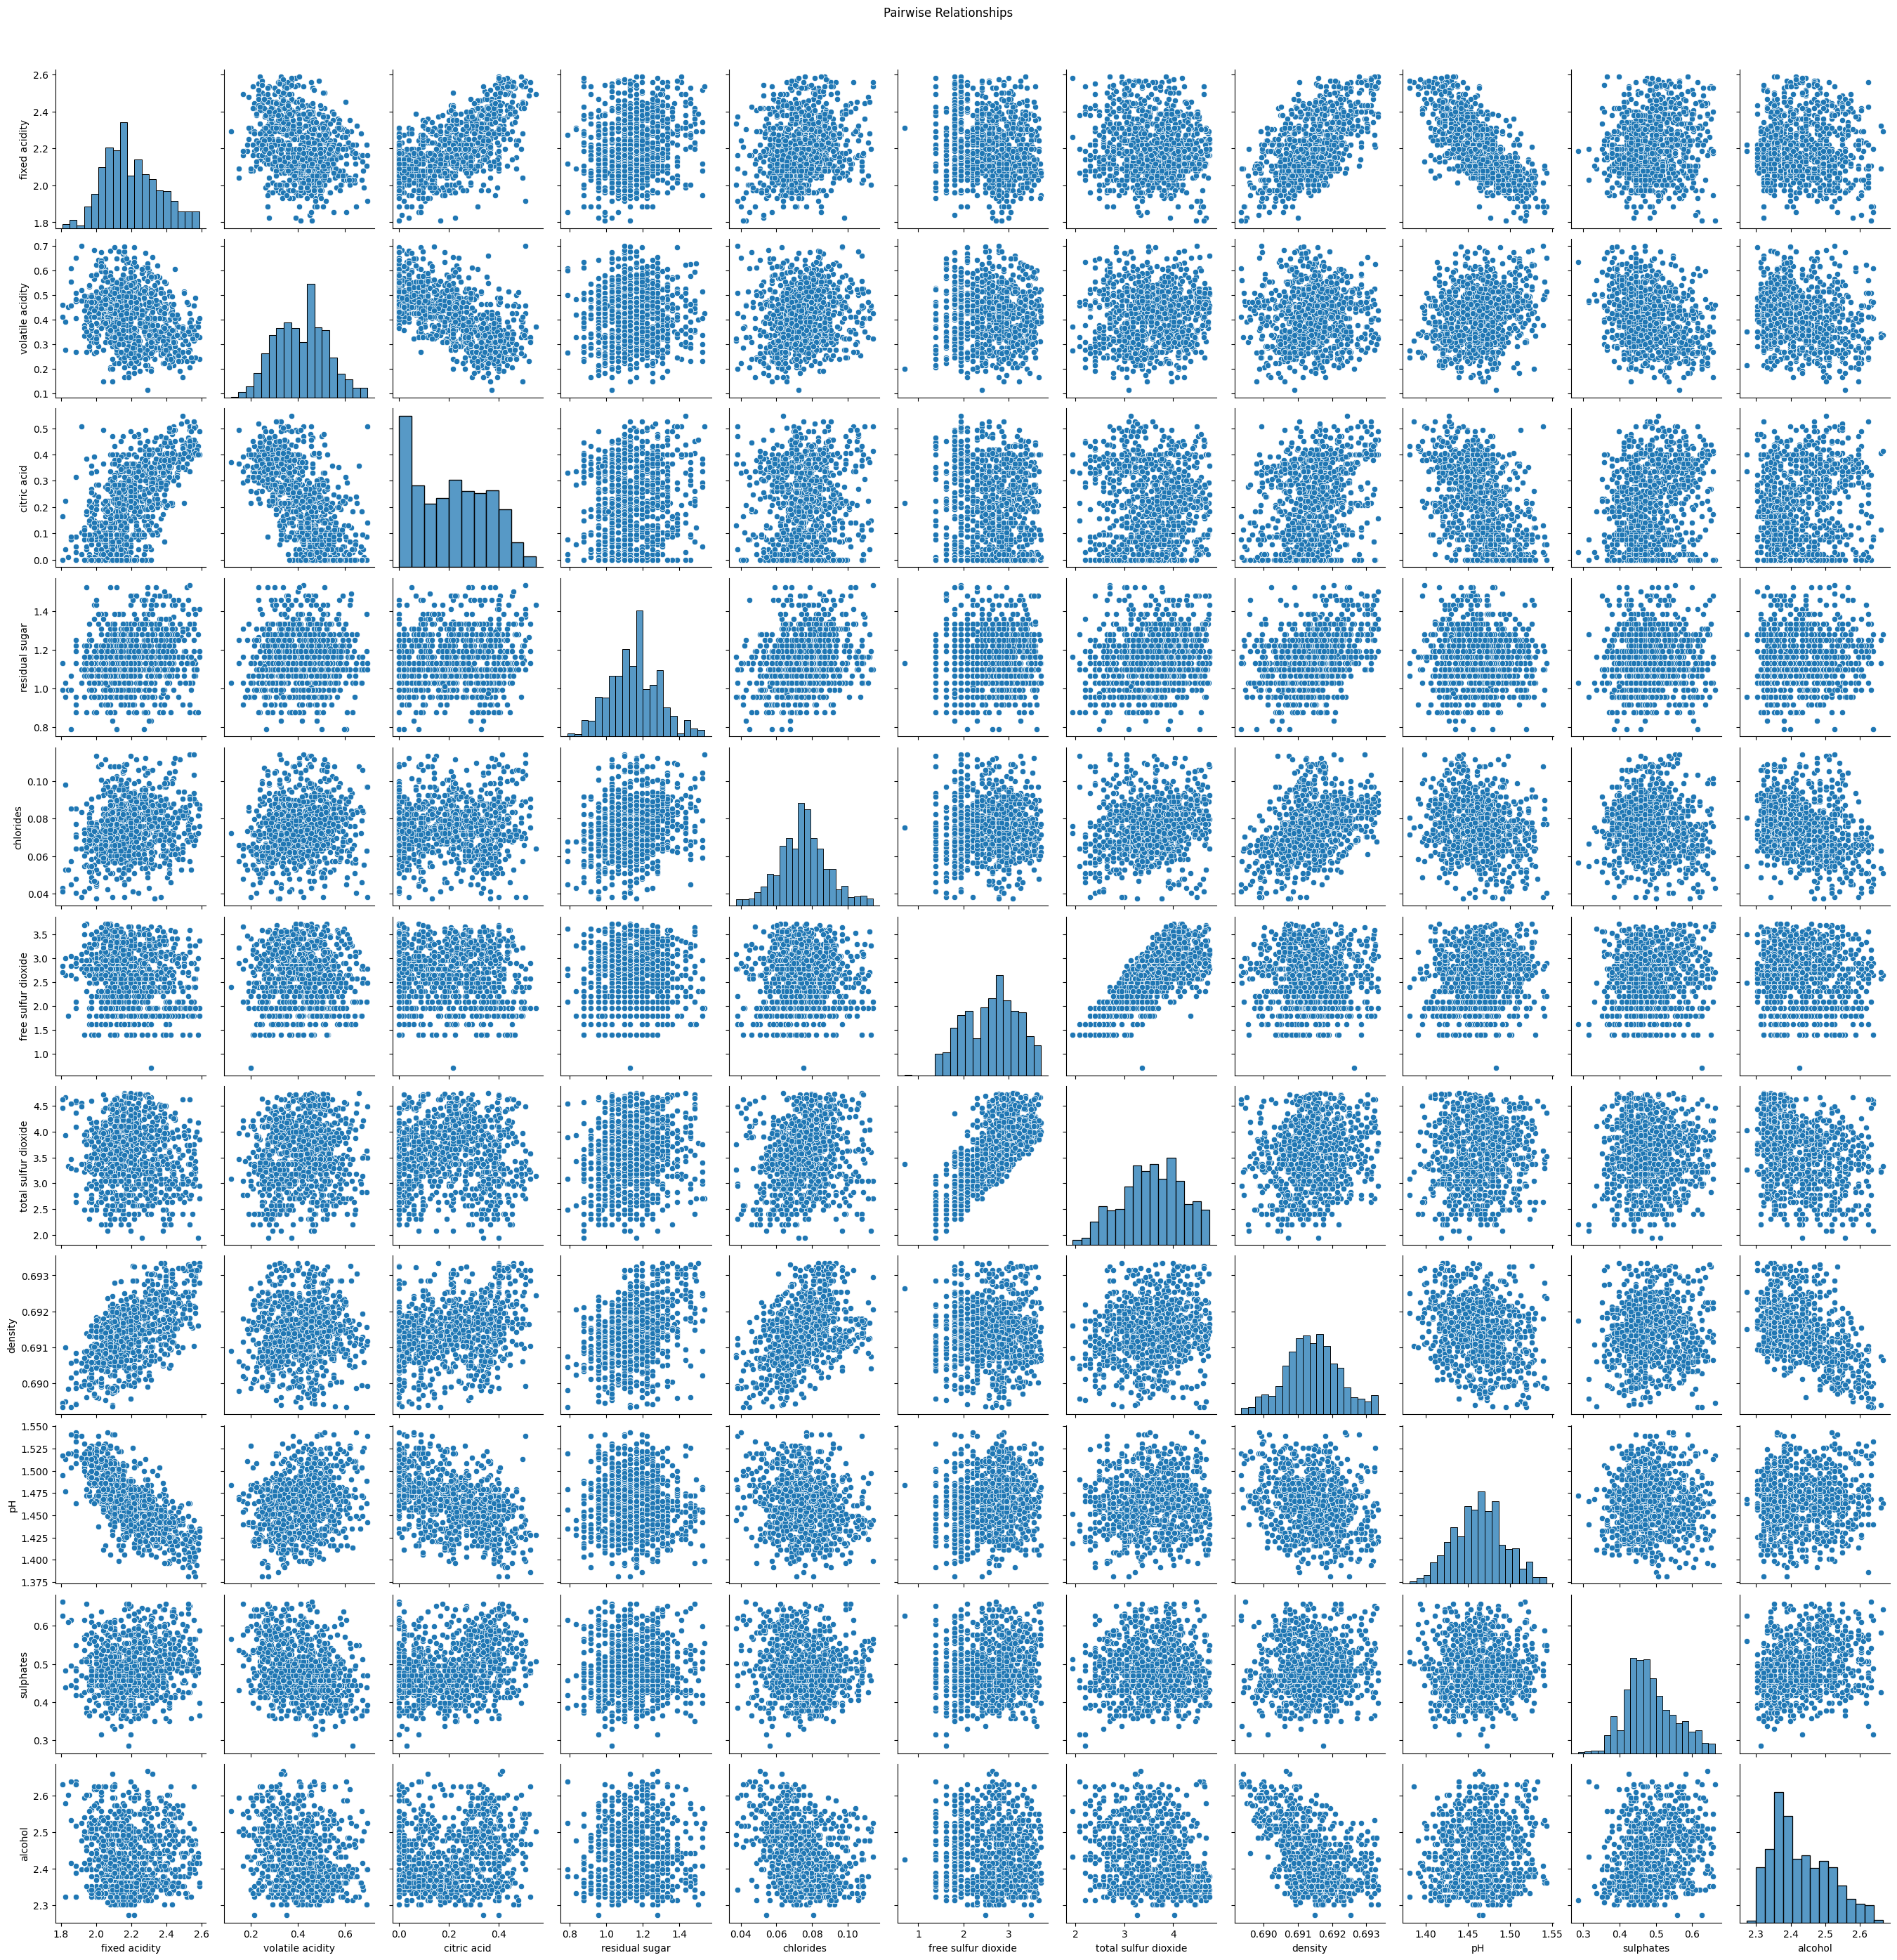

In [80]:
import seaborn as sns

sns.pairplot(df )
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [81]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df)


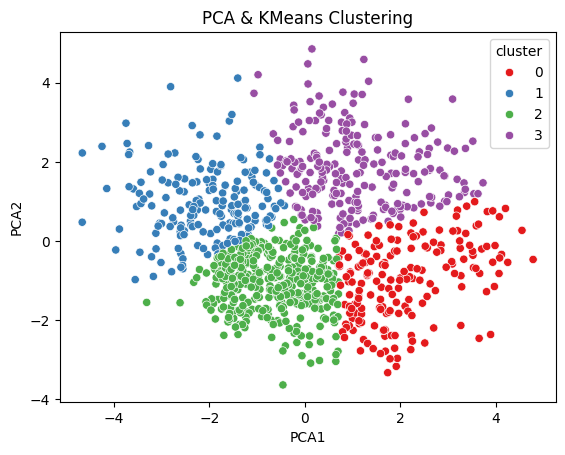

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Standardize the data
X_scaled = StandardScaler().fit_transform(df)

# Step 2: Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply K-Means clustering (choose number of clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Step 4: Add results to DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['cluster'] = clusters  

# Step 5: Visualize the clusters in 2D PCA space
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='Set1', data=df)
plt.title("PCA & KMeans Clustering")
plt.show()


In [83]:
from sklearn.metrics import adjusted_rand_score , normalized_mutual_info_score ,silhouette_score
print(y.shape, clusters.shape)
print(y.unique())
cluster=df['cluster']
print(cluster.unique())
ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
nmi = normalized_mutual_info_score(y, clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

sil_score = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {sil_score:.3f}")


(974,) (974,)
[5 6 7 4]
[2 0 1 3]
Adjusted Rand Index (ARI): 0.078
Normalized Mutual Information (NMI): 0.087
Silhouette Score: 0.371



--- KMeans ---
Silhouette Score: 0.153
Adjusted Rand Index (ARI): 0.065
Normalized Mutual Information (NMI): 0.092


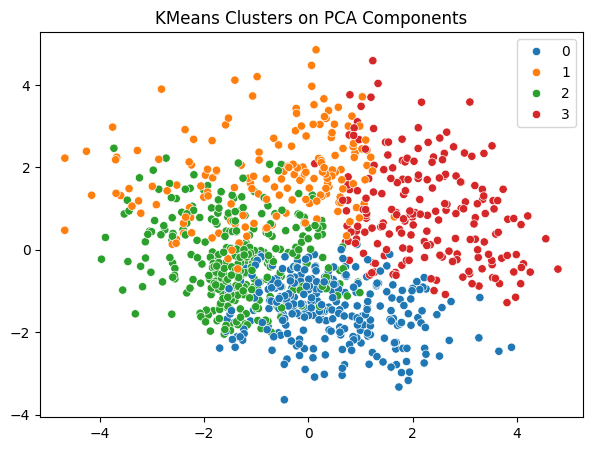


--- DBSCAN ---
Silhouette Score: Cannot compute (only one cluster or noise present)
Adjusted Rand Index (ARI): 0.002
Normalized Mutual Information (NMI): 0.023


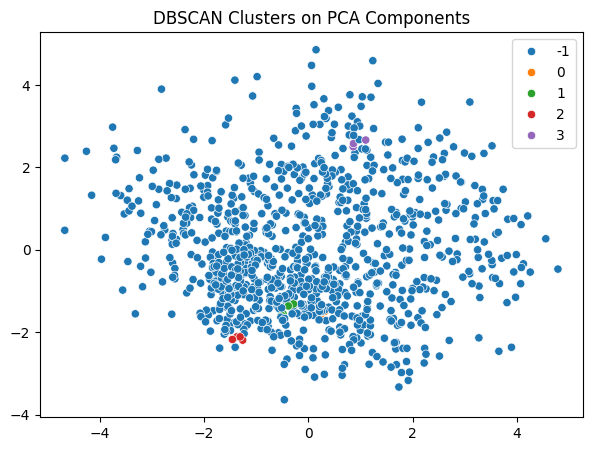


--- Agglomerative ---
Silhouette Score: 0.135
Adjusted Rand Index (ARI): 0.090
Normalized Mutual Information (NMI): 0.081


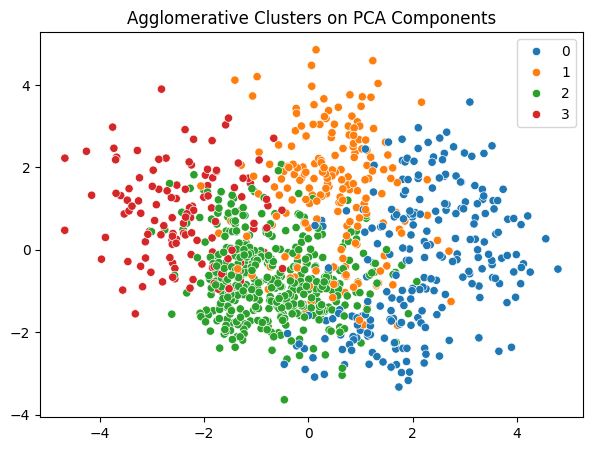

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score



pca = PCA(n_components=8)  # Adjust n_components as needed
X_pca = pca.fit_transform(X_scaled)

# Dictionary to store results
models = {
    'KMeans': KMeans(n_clusters=4, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=3),
    'Agglomerative': AgglomerativeClustering(n_clusters=4)
}
for name, model in models.items():
    print(f"\n--- {name} ---")
    clusters = model.fit_predict(X_pca)

    # Add clusters to df for plotting
    df[f'{name}_cluster'] = clusters

    # Silhouette Score (only if more than 1 cluster found)
    if len(set(clusters)) > 1 and -1 not in set(clusters):
        sil_score = silhouette_score(X_pca, clusters)
        print(f"Silhouette Score: {sil_score:.3f}")
    else:
        print("Silhouette Score: Cannot compute (only one cluster or noise present)")

    # If true labels exist, evaluate ARI and NMI
    if y is not None:
        ari = adjusted_rand_score(y, clusters)
        nmi = normalized_mutual_info_score(y, clusters)
        print(f"Adjusted Rand Index (ARI): {ari:.3f}")
        print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

    # Plot clusters
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10', legend='full')
    plt.title(f'{name} Clusters on PCA Components')
    plt.show()

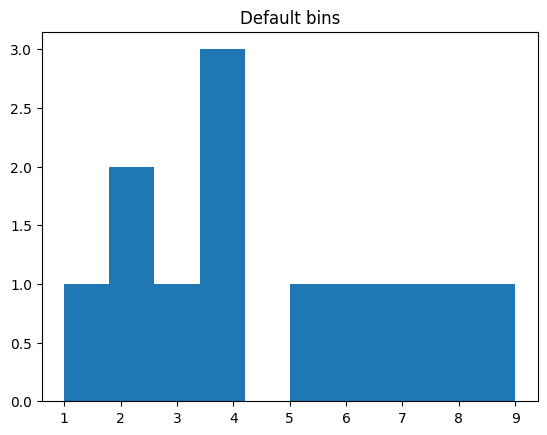

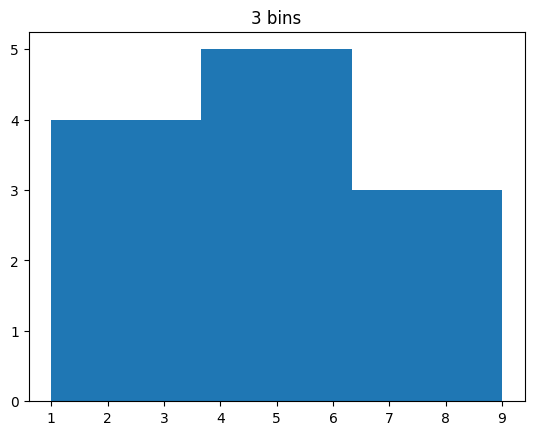

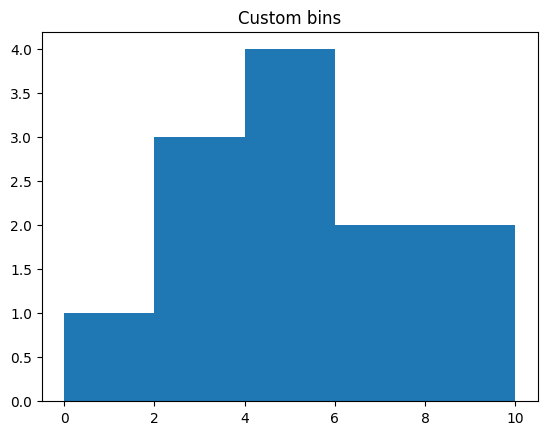

In [86]:
import matplotlib.pyplot as plt

data = [1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9]

# Auto-binning
plt.hist(data)
plt.title("Default bins")
plt.show()

# Manual number of bins
plt.hist(data, bins=3)
plt.title("3 bins")
plt.show()

# Custom bin edges
plt.hist(data, bins=[0, 2, 4, 6, 8, 10])
plt.title("Custom bins")
plt.show()
